In [1]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
wazir = load_model('./wazirtrainingscale2.h5') 

In [3]:
wazir.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        5248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
__________

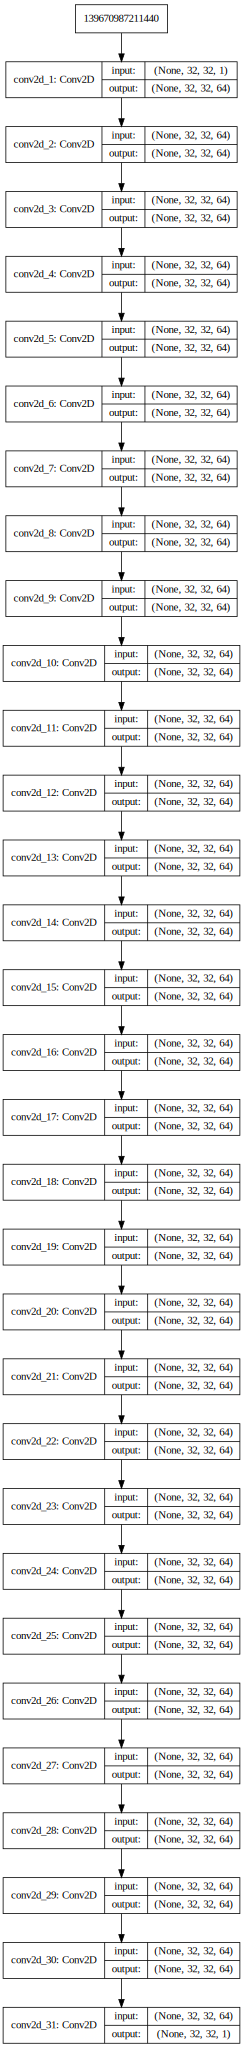

In [4]:
SVG(model_to_dot(wazir, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
# Freeze the layers except the last 4 layers
for layer in wazir.layers[:-4]:
    layer.trainable = False

In [6]:
# Check the trainable status of the individual layers
for layer in wazir.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f07af940278> False
<keras.layers.convolutional.Conv2D object at 0x7f07af9405f8> False
<keras.layers.convolutional.Conv2D object at 0x7f07af90a438> False
<keras.layers.convolutional.Conv2D object at 0x7f07af924a90> False
<keras.layers.convolutional.Conv2D object at 0x7f07af8d3710> False
<keras.layers.convolutional.Conv2D object at 0x7f07af886668> False
<keras.layers.convolutional.Conv2D object at 0x7f07af838240> False
<keras.layers.convolutional.Conv2D object at 0x7f07af9404e0> False
<keras.layers.convolutional.Conv2D object at 0x7f07af5dc8d0> False
<keras.layers.convolutional.Conv2D object at 0x7f07af58c828> False
<keras.layers.convolutional.Conv2D object at 0x7f07af540400> False
<keras.layers.convolutional.Conv2D object at 0x7f07af56e0f0> False
<keras.layers.convolutional.Conv2D object at 0x7f07af507a90> False
<keras.layers.convolutional.Conv2D object at 0x7f07af538710> False
<keras.layers.convolutional.Conv2D object at 0x7f07af4e8668> F

In [7]:
# Create the model
wazirmodel = models.Sequential()
# Add the new created model to base model
wazirmodel.add(wazir)
# Add new layers
wazirmodel.add(layers.Flatten())
wazirmodel.add(layers.Dense(1024, activation='relu'))
wazirmodel.add(layers.Dropout(0.5))
wazirmodel.add(layers.Dense(3, activation='softmax'))

In [8]:
wazirmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 32, 32, 1)         1077761   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 2,130,436
Trainable params: 1,165,060
Non-trainable params: 965,376
_________________________________________________________________


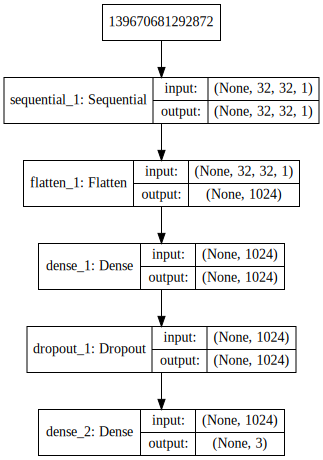

In [9]:
SVG(model_to_dot(wazirmodel, show_shapes=True).create(prog='dot', format='svg'))